In [ ]:
import torch
from torch.nn import CosineSimilarity
from BenchmarkTests.RL.sac_continuous_action import Actor
from BenchmarkTests.RL.meow_continuous_action import FlowPolicy
import matplotlib.pyplot as plt
import os

2025-02-12 15:50:39.354959: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-12 15:50:42.303579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739400643.325474 1054854 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739400643.687754 1054854 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-12 15:50:46.667544: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def plot_sac(path, relu):
    model = torch.load(path, map_location='cpu')
    u,s,v = torch.svd(model.fc1.weight.data)
    if relu : 
        u = torch.nn.functional.relu(u)
    cos_similarities1 = [CosineSimilarity(dim=0)(u_vec, model.fold1.n.data).item() for u_vec in u.T]
    u,s,v = torch.svd(model.fc2.weight.data)
    if relu : 
        u = torch.nn.functional.relu(u)
    cos_similarities2 = [CosineSimilarity(dim=0)(u_vec, model.fold2.n.data).item() for u_vec in u.T]

    plt.plot(cos_similarities1, label='fc1')
    plt.legend()
    plt.show()
    plt.plot(cos_similarities2, label='fc2')
    plt.legend()
    plt.show()

/tmp/ipykernel_358423/3283167069.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path, map_location='cpu')


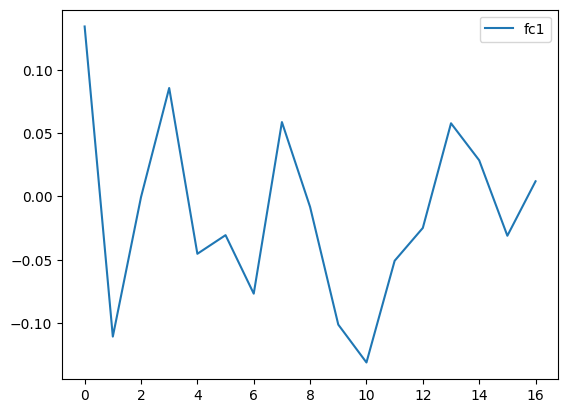

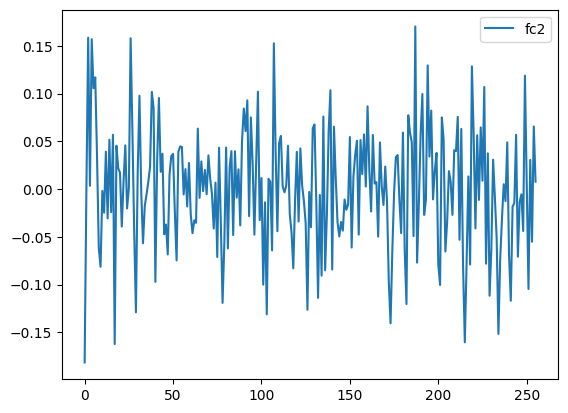

In [ ]:
plot_sac('BenchmarkTests/RL/runs/HalfCheetah-v4/sac_fold/combo_1_seed_3/test_rewards.pt', relu=False)

/tmp/ipykernel_3275066/721859335.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path, map_location='cpu')


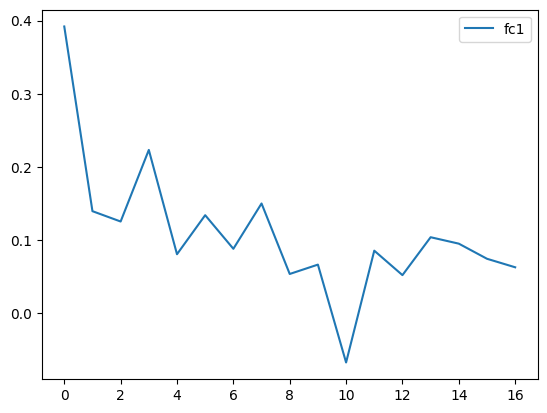

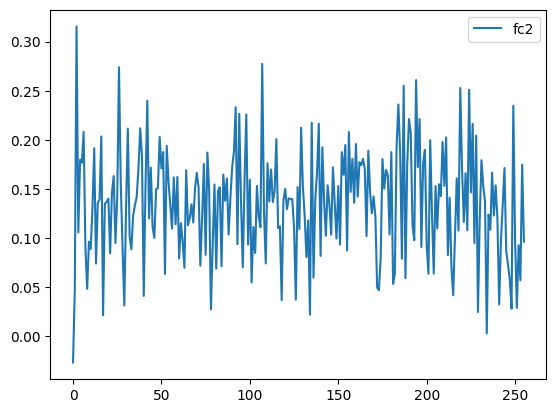

In [3]:
plot_sac('BenchmarkTests/RL/runs/HalfCheetah-v4/sac_fold/combo_1_seed_3/test_rewards.pt', relu=True)

In [6]:
def plot_meow(path):
    model = torch.load(path, map_location='cpu')
    for masked_cond_affine_flow_num in range(4) :
        for layer in [0, 5] :
            u,s,v = torch.svd(model.flows[masked_cond_affine_flow_num].t.net[layer].weight.data)
            cos_similarities = [CosineSimilarity(dim=0)(u_vec, model.flows[masked_cond_affine_flow_num].t.net[layer+4].n.data).item() for u_vec in u.T]
            cos_similarities_relu = [CosineSimilarity(dim=0)(u_vec, model.flows[masked_cond_affine_flow_num].t.net[layer+4].n.data).item() for u_vec in torch.nn.functional.relu(u).T]
            # plt.plot(cos_similarities)
            # plt.title(f'flow {masked_cond_affine_flow_num} layer {layer} no relu')
            # plt.show()
            plt.plot(cos_similarities_relu)
            plt.title(f'flow {masked_cond_affine_flow_num} layer {layer} relu')
            plt.show()
    
    for layer in [0, 4] :
        u,s,v = torch.svd(model.flows[4].scale1.net[layer].weight.data)
        cos_similarities = [CosineSimilarity(dim=0)(u_vec, model.flows[4].scale1.net[layer+3].n.data).item() for u_vec in u.T]
        cos_similarities_relu = [CosineSimilarity(dim=0)(u_vec, model.flows[4].scale1.net[layer+3].n.data).item() for u_vec in torch.nn.functional.relu(u).T]
        # plt.plot(cos_similarities)
        # plt.title(f'CondScaling scale 1 layer {layer}')
        # plt.show()
        plt.plot(cos_similarities_relu)
        plt.title(f'CondScaling scale 1 layer {layer} relu')
        plt.show()
    
    for layer in [0, 4] :
        u,s,v = torch.svd(model.flows[4].scale2.net[layer].weight.data)
        cos_similarities = [CosineSimilarity(dim=0)(u_vec, model.flows[4].scale2.net[layer+3].n.data).item() for u_vec in u.T]
        cos_similarities_relu = [CosineSimilarity(dim=0)(u_vec, model.flows[4].scale2.net[layer+3].n.data).item() for u_vec in torch.nn.functional.relu(u).T]
        # plt.plot(cos_similarities)
        # plt.title(f'CondScaling scale 2 layer {layer}')
        # plt.show()
        plt.plot(cos_similarities_relu)
        plt.title(f'CondScaling scale 2 layer {layer} relu')
        plt.show()

    for layer in [0, 3] :
        u,s,v = torch.svd(model.prior.log_scale.net[layer].weight.data)
        cos_similarities = [CosineSimilarity(dim=0)(u_vec, model.prior.log_scale.net[layer+2].n.data).item() for u_vec in u.T]
        cos_similarities_relu = [CosineSimilarity(dim=0)(u_vec, model.prior.log_scale.net[layer+2].n.data).item() for u_vec in torch.nn.functional.relu(u).T]
        # plt.plot(cos_similarities)
        # plt.title(f'Prior layer {layer}')
        # plt.show()
        plt.plot(cos_similarities_relu)
        plt.title(f'Prior layer {layer} relu')
        plt.show()

/tmp/ipykernel_3275066/3113098955.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path, map_location='cpu')


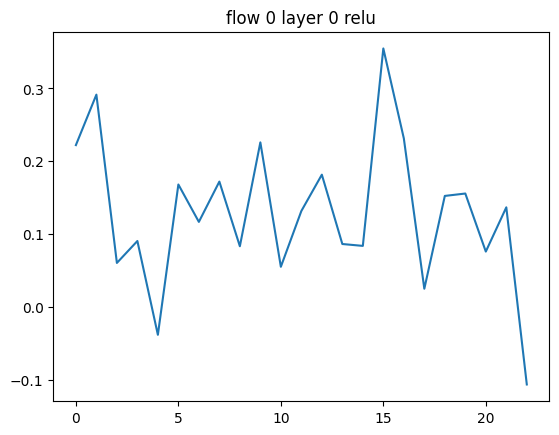

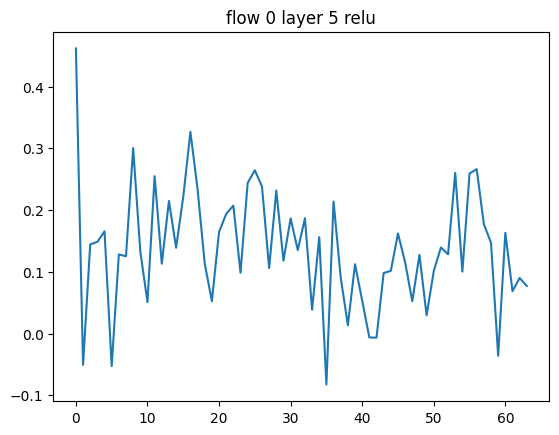

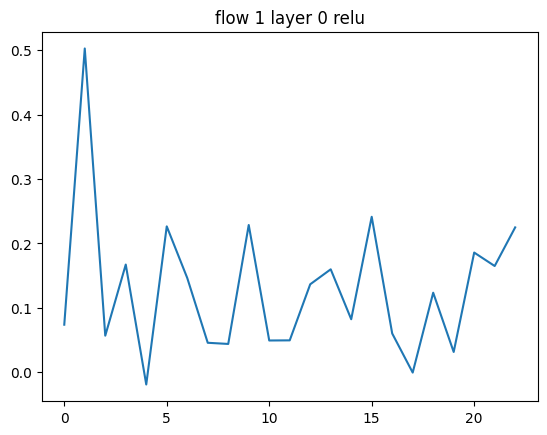

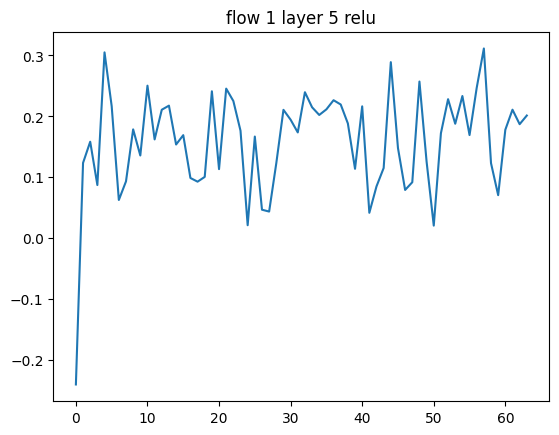

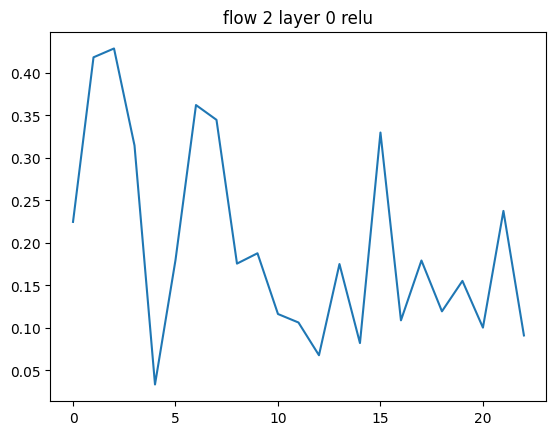

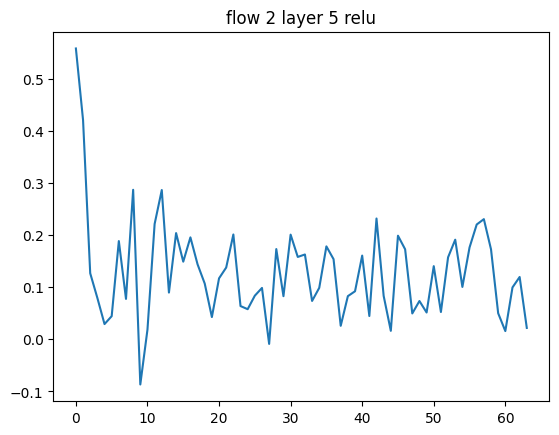

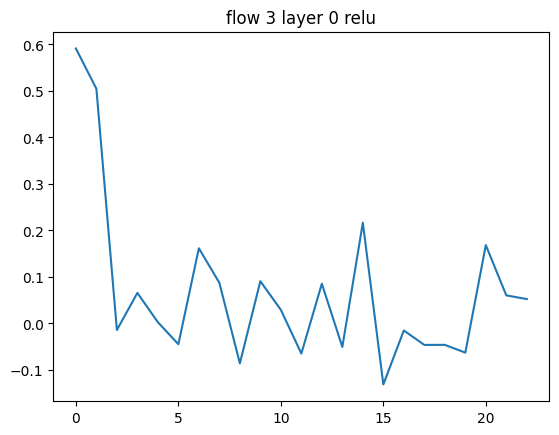

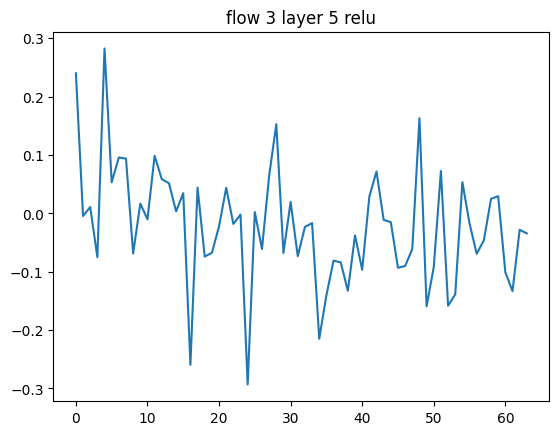

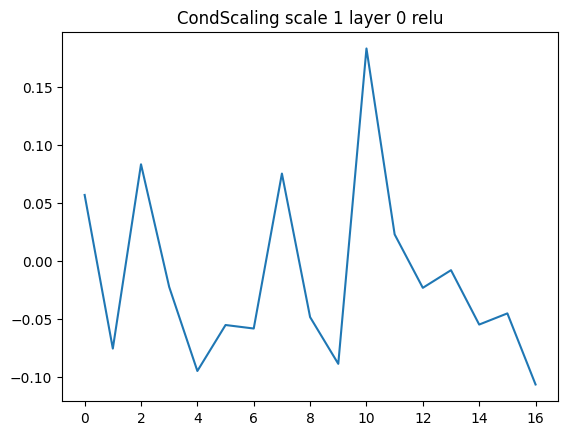

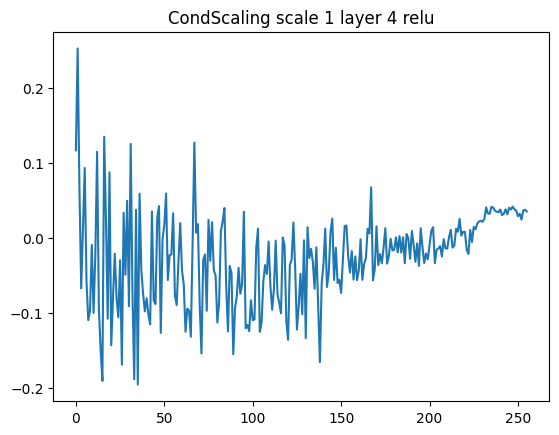

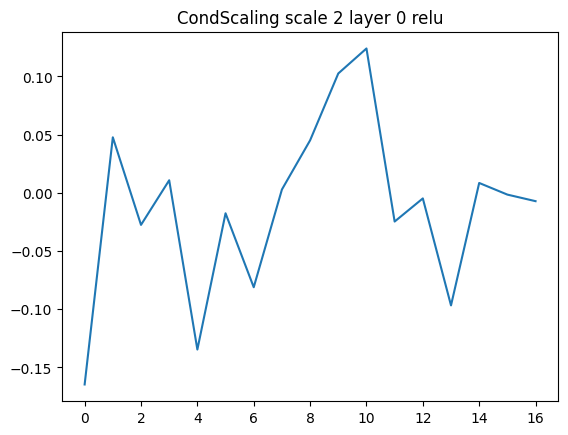

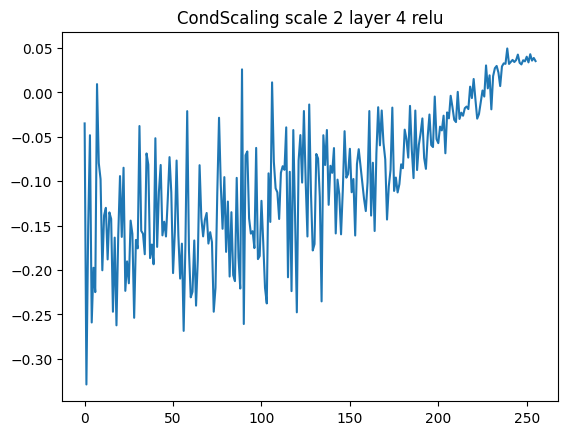

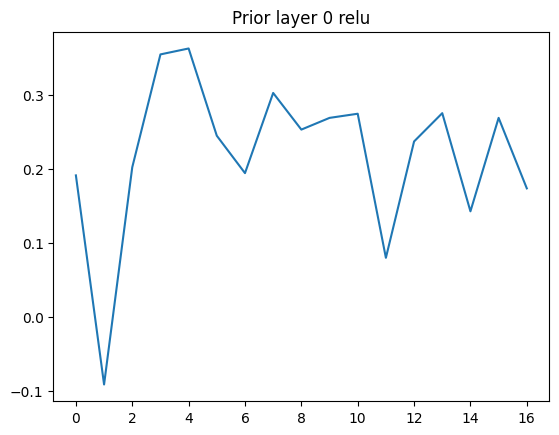

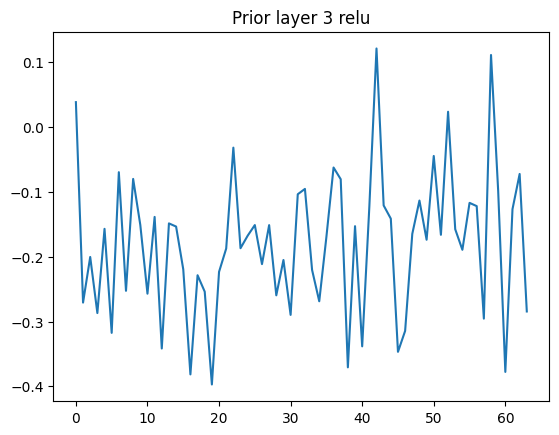

In [7]:
plot_meow('BenchmarkTests/RL/runs/HalfCheetah-v4/meow_fold/combo_1_seed_1/test_rewards.pt')

In [21]:
def plot_singular_values(path) : 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for fold, color in zip(['', '_fold'], ['blue', 'red']) :
        for seed in range(1,4) :
            model = torch.load(os.path.join(path+fold, f'combo_1_seed_{seed}', 'test_rewards.pt'), map_location='cpu')
            u,s,v = torch.svd(model.fc1.weight.data)
            axs[0].plot(s, color=color, label='no_fold' if fold == '' else 'fold')
            u,s,v = torch.svd(model.fc2.weight.data)
            axs[1].plot(s, color=color, label='no_fold' if fold == '' else 'fold')

    axs[0].set_title('fc1')
    axs[1].set_title('fc2')
    env, algo = path.split('/')[-2:]
    fig.suptitle(f'{env} {algo}')
    plt.legend()

/tmp/ipykernel_1054854/1456838376.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(path+fold, f'combo_1_seed_{seed}', 'test_rewards.pt'), 

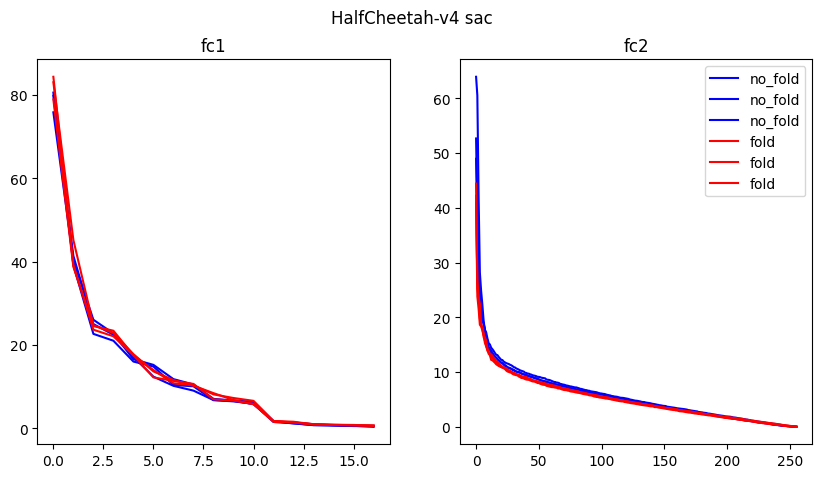

In [22]:
plot_singular_values('BenchmarkTests/RL/runs/HalfCheetah-v4/sac')

/tmp/ipykernel_1054854/1456838376.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(path+fold, f'combo_1_seed_{seed}', 'test_rewards.pt'), 

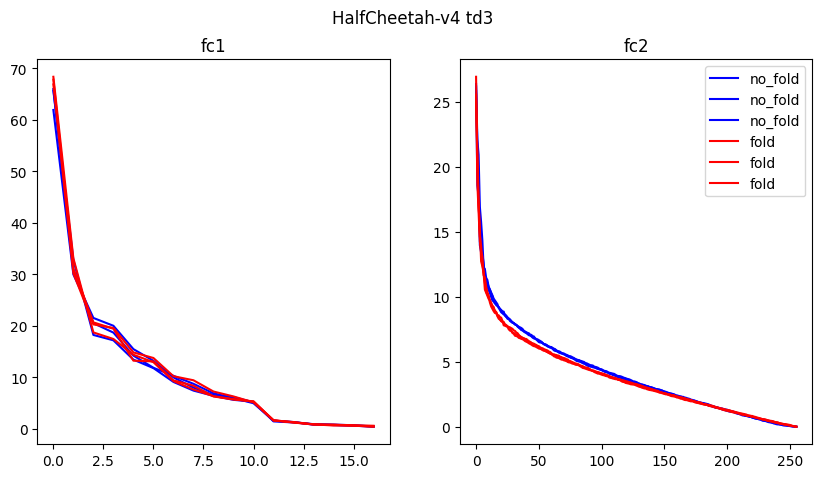

In [23]:
plot_singular_values('BenchmarkTests/RL/runs/HalfCheetah-v4/td3')

/tmp/ipykernel_1054854/1456838376.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(path+fold, f'combo_1_seed_{seed}', 'test_rewards.pt'), 

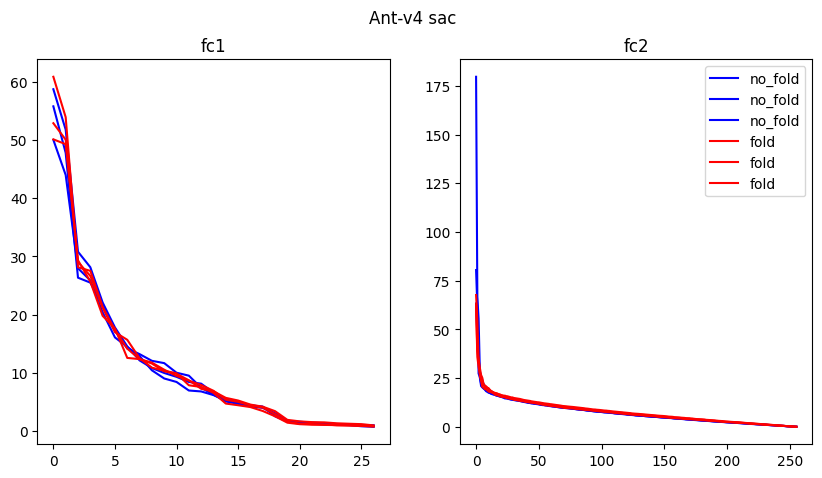

In [24]:
plot_singular_values('BenchmarkTests/RL/runs/Ant-v4/sac')

/tmp/ipykernel_1054854/1456838376.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(path+fold, f'combo_1_seed_{seed}', 'test_rewards.pt'), 

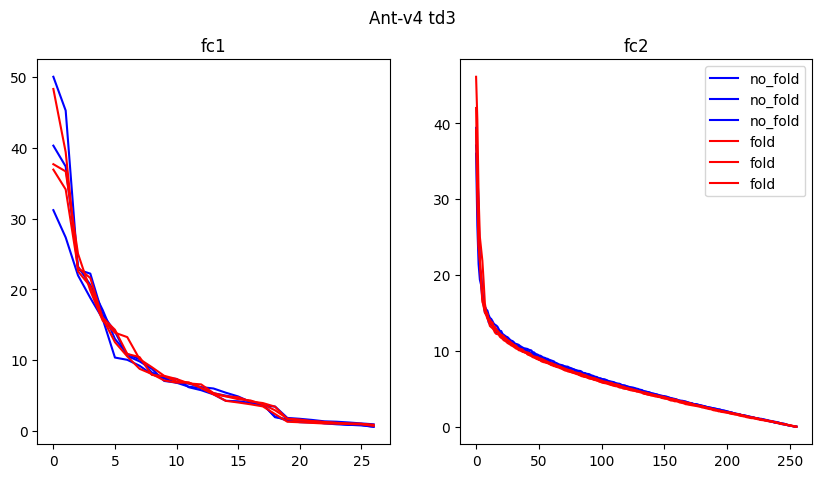

In [25]:
plot_singular_values('BenchmarkTests/RL/runs/Ant-v4/td3')